In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/NN_proj/gwhd_2021.zip" -d "/content" &> /dev/null

In [4]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import warnings
import os
from glob import glob
import shutil
import time
import shutil
warnings.filterwarnings('ignore')

In [5]:
# setup directory and files
base_dir = "/content/gwhd_2021"
train_dataframe = os.path.join(base_dir, 'competition_train.csv')
test_dataframe = os.path.join(base_dir, 'competition_test.csv')
val_dataframe = os.path.join(base_dir, 'competition_val.csv')
images_dir = os.path.join(base_dir, 'images/')

In [6]:
# Load dataframe
train_df = pd.read_csv(train_dataframe)
test_df = pd.read_csv(test_dataframe)
val_df = pd.read_csv(val_dataframe)

train_df.head()

image_name  \
0  4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...   
1  a2a15938845d9812de03bd44799c4b1bf856a8ad11752e...   
2  401f89a2bb6ab63e3f406bd59b9cadccfe953230feb6cd...   
3  0a3937653483c36dfb4d957b6f82ae96dbdc7ba36cc3d8...   
4  be1652110a44acd24b42784356e965ce84a04893c3f1bb...   

                                         BoxesString     domain  
0  99 692 160 764;641 27 697 115;935 978 1012 102...  Arvalis_1  
1  230 143 321 222;928 929 1015 1004;485 557 604 ...  Arvalis_1  
2  440 239 544 288;333 538 429 594;913 171 963 20...  Arvalis_1  
3  112 274 188 303;892 812 958 847;0 889 67 928;1...  Arvalis_1  
4  810 204 863 314;360 231 425 408;452 348 510 47...  Arvalis_1

In [7]:
# some information about data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_name   3657 non-null   object
 1   BoxesString  3657 non-null   object
 2   domain       3657 non-null   object
dtypes: object(3)
memory usage: 85.8+ KB


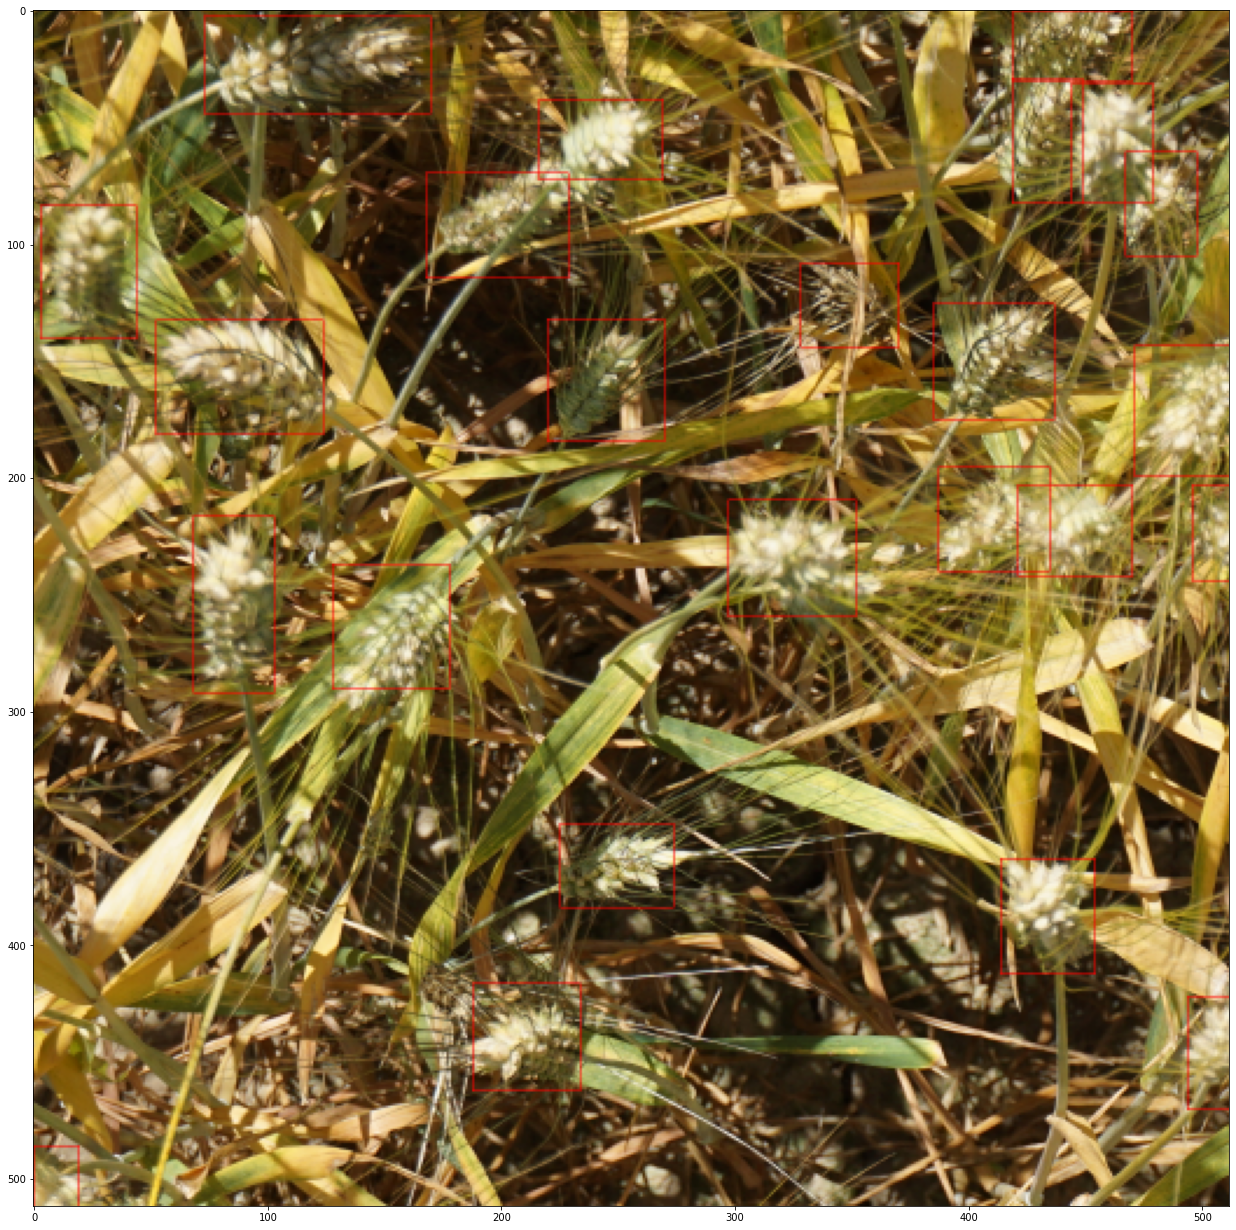

In [8]:
image_index = 569

# checking bounding box with one image
check_img_name = train_df.loc[image_index,'image_name']
img = cv2.imread(images_dir + check_img_name)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

bboxs = train_df['BoxesString'][image_index].split(';')
for i in range(len(bboxs)):
  bbox = [int(val) for val in bboxs[i].split(' ')]
  rec = cv2.rectangle(rgb_img, (bbox[0],bbox[1]), (bbox[2],bbox[3]), (255,0,0), 1, 1)
rgb_img = cv2.resize(rgb_img, None, fx=0.5, fy=0.5)
plt.figure(figsize = (22,22))
plt.imshow(rgb_img)

In [9]:
os.makedirs('datasets/GlobalWhaet/images/train')
os.makedirs('datasets/GlobalWhaet/images/test')
os.makedirs('datasets/GlobalWhaet/images/val')
os.makedirs('datasets/GlobalWhaet/labels/train')
os.makedirs('datasets/GlobalWhaet/labels/test')
os.makedirs('datasets/GlobalWhaet/labels/val')

In [10]:
IMAGE_SIZE = 1024

cnt=0
for i in range(len(train_df)):
  bboxs = train_df['BoxesString'][i].split(';')
  label_path = os.path.join('/content/datasets/GlobalWhaet/labels/train', 
                            train_df['image_name'][i].split('.')[0] + '.txt')
  with open(label_path, 'w') as label_file:
    if(bboxs[0] != 'no_box'):
      for j in range(len(bboxs)):
        bbox = [int(val) for val in bboxs[j].split(' ')]
        
        label_file.write('0 {} {} {} {}\n'.format(
            ((bbox[0]+bbox[2])/2)/IMAGE_SIZE, 
            ((bbox[1]+bbox[3])/2)/IMAGE_SIZE,
            (bbox[2]-bbox[0])/IMAGE_SIZE,
            (bbox[3]-bbox[1])/IMAGE_SIZE))
  
  
  shutil.copy(os.path.join(images_dir, train_df['image_name'][i]), 
              '/content/datasets/GlobalWhaet/images/train')

  if i % 100 == 0:
    print('image remained:' ,len(train_df) - i)


image remained: 3657
image remained: 3557
image remained: 3457
image remained: 3357
image remained: 3257
image remained: 3157
image remained: 3057
image remained: 2957
image remained: 2857
image remained: 2757
image remained: 2657
image remained: 2557
image remained: 2457
image remained: 2357
image remained: 2257
image remained: 2157
image remained: 2057
image remained: 1957
image remained: 1857
image remained: 1757
image remained: 1657
image remained: 1557
image remained: 1457
image remained: 1357
image remained: 1257
image remained: 1157
image remained: 1057
image remained: 957
image remained: 857
image remained: 757
image remained: 657
image remained: 557
image remained: 457
image remained: 357
image remained: 257
image remained: 157
image remained: 57


In [11]:
cnt=0
for i in range(len(test_df)):
  bboxs = test_df['BoxesString'][i].split(';')
  label_path = os.path.join('/content/datasets/GlobalWhaet/labels/test', 
                            test_df['image_name'][i].split('.')[0] + '.txt')
  with open(label_path, 'w') as label_file:
    if(bboxs[0] != 'no_box'):
      for j in range(len(bboxs)):
        bbox = [int(val) for val in bboxs[j].split(' ')]
        
        label_file.write('0 {} {} {} {}\n'.format(
            ((bbox[0]+bbox[2])/2)/IMAGE_SIZE, 
            ((bbox[1]+bbox[3])/2)/IMAGE_SIZE,
            (bbox[2]-bbox[0])/IMAGE_SIZE,
            (bbox[3]-bbox[1])/IMAGE_SIZE))
  
  
  shutil.copy(os.path.join(images_dir, test_df['image_name'][i]), 
              '/content/datasets/GlobalWhaet/images/test')

  if i % 100 == 0:
    print('image remained:' ,len(test_df) - i)

image remained: 1382
image remained: 1282
image remained: 1182
image remained: 1082
image remained: 982
image remained: 882
image remained: 782
image remained: 682
image remained: 582
image remained: 482
image remained: 382
image remained: 282
image remained: 182
image remained: 82


In [12]:
cnt=0
for i in range(len(val_df)):
  bboxs = val_df['BoxesString'][i].split(';')
  label_path = os.path.join('/content/datasets/GlobalWhaet/labels/val', 
                            val_df['image_name'][i].split('.')[0] + '.txt')
  with open(label_path, 'w') as label_file:
    if(bboxs[0] != 'no_box'):
      for j in range(len(bboxs)):
        bbox = [int(val) for val in bboxs[j].split(' ')]
        
        label_file.write('0 {} {} {} {}\n'.format(
            ((bbox[0]+bbox[2])/2)/IMAGE_SIZE, 
            ((bbox[1]+bbox[3])/2)/IMAGE_SIZE,
            (bbox[2]-bbox[0])/IMAGE_SIZE,
            (bbox[3]-bbox[1])/IMAGE_SIZE))
  
  
  shutil.copy(os.path.join(images_dir, val_df['image_name'][i]), 
              '/content/datasets/GlobalWhaet/images/val')

  if i % 100 == 0:
    print('image remained:' ,len(val_df) - i)

image remained: 1476
image remained: 1376
image remained: 1276
image remained: 1176
image remained: 1076
image remained: 976
image remained: 876
image remained: 776
image remained: 676
image remained: 576
image remained: 476
image remained: 376
image remained: 276
image remained: 176
image remained: 76


# YOLO v5s

In [13]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12264, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 12264 (delta 18), reused 22 (delta 13), pack-reused 12229
Receiving objects: 100% (12264/12264), 11.95 MiB | 32.04 MiB/s, done.
Resolving deltas: 100% (8488/8488), done.
/content/yolov5
     |████████████████████████████████| 596 kB 34.0 MB/s 
     |████████████████████████████████| 145 kB 31.1 MB/s 
     |████████████████████████████████| 178 kB 53.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 138 kB 69.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googl

In [23]:
!python train.py --img 512 --batch 64 --epochs 100 --cfg yolov5s.yaml --data '/content/drive/MyDrive/Colab Notebooks/NN_proj/GlobalWhaet.yaml' --weights yolov5s.pt --freeze 10 --cache

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/drive/MyDrive/Colab Notebooks/NN_proj/GlobalWhaet.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor

In [24]:
!zip -r '/content/drive/MyDrive/Colab Notebooks/NN_proj/yolov5s_FreezeBackbone_B64.zip' '/content/yolov5/runs/train/exp2'

  adding: content/yolov5/runs/train/exp2/ (stored 0%)
  adding: content/yolov5/runs/train/exp2/val_batch0_labels.jpg (deflated 2%)
  adding: content/yolov5/runs/train/exp2/train_batch2.jpg (deflated 1%)
  adding: content/yolov5/runs/train/exp2/opt.yaml (deflated 42%)
  adding: content/yolov5/runs/train/exp2/PR_curve.png (deflated 18%)
  adding: content/yolov5/runs/train/exp2/F1_curve.png (deflated 17%)
  adding: content/yolov5/runs/train/exp2/labels.jpg (deflated 19%)
  adding: content/yolov5/runs/train/exp2/P_curve.png (deflated 19%)
  adding: content/yolov5/runs/train/exp2/events.out.tfevents.1655399606.2360dc8c50ce.780.0 (deflated 43%)
  adding: content/yolov5/runs/train/exp2/val_batch1_pred.jpg (deflated 2%)
  adding: content/yolov5/runs/train/exp2/train_batch1.jpg (deflated 1%)
  adding: content/yolov5/runs/train/exp2/results.csv (deflated 85%)
  adding: content/yolov5/runs/train/exp2/train_batch0.jpg (deflated 1%)
  adding: content/yolov5/runs/train/exp2/val_batch0_pred.jpg (defl

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/datasets/GlobalWhaet/images/test/032037a1be58cbb3d4bf5ae1d34721f4e88800b0c73b0d9dc965cc64e72fc4ef.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
image 1/1 /content/datasets/GlobalWhaet/images/test/032037a1be58cbb3d4bf5ae1d34721f4e88800b0c73b0d9dc965cc64e72fc4ef.png: 640x640 47 wheat_heads, Done. (0.015s)
Speed: 0.5ms pre-process, 15.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results save

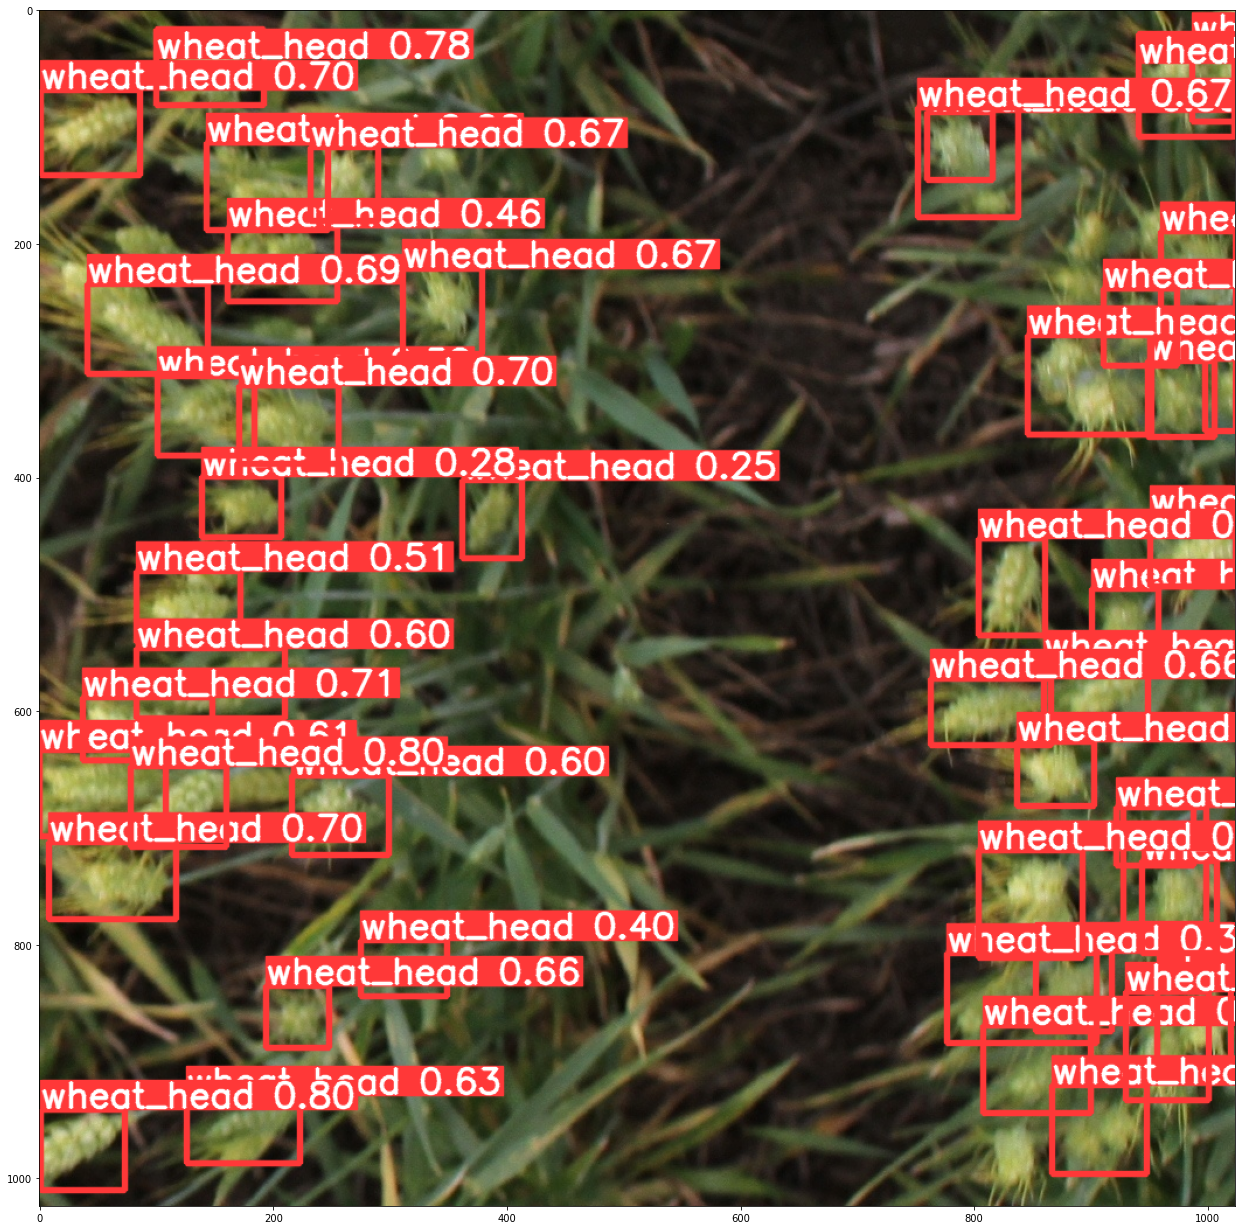

In [26]:
!python detect.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --source '/content/datasets/GlobalWhaet/images/test/032037a1be58cbb3d4bf5ae1d34721f4e88800b0c73b0d9dc965cc64e72fc4ef.png'

img = cv2.imread('/content/yolov5/runs/detect/exp2/032037a1be58cbb3d4bf5ae1d34721f4e88800b0c73b0d9dc965cc64e72fc4ef.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (22,22))
plt.imshow(rgb_img)

In [28]:
!python val.py --weights '/content/yolov5/runs/train/exp2/weights/best.pt' --data '/content/drive/MyDrive/Colab Notebooks/NN_proj/GlobalWhaet.yaml' --img 512 --batch-size 64 --task test

val: data=/content/drive/MyDrive/Colab Notebooks/NN_proj/GlobalWhaet.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=64, imgsz=512, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-253-g75bbaa8 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients
test: Scanning '/content/datasets/GlobalWhaet/labels/test' images and labels...1381 found, 0 missing, 47 empty, 3 corrupt: 100% 1381/1381 [00:05<00:00, 236.85it/s]
test: WARNING: /content/datasets/GlobalWhaet/images/test/0af5c1bc753619e4f5d504e5424d056af22954f04d50cd0d4a21682cfdd9a4dc.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0195      1.0059      1.0088      1.0176      1.02

In [29]:
!zip -r '/content/drive/MyDrive/Colab Notebooks/NN_proj/yolov5s_FreezeBackbone_B64_all.zip' '/content/yolov5/runs' &> /dev/null